# Week-3 IBM DS Professional Assignment-Part3

Assignment Details & Submission Guidelines

Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you.

Just make sure:

to add enough Markdown cells to explain what you decided to do and to report any observations you make.
to generate maps to visualize your neighborhoods and how they cluster together.
Once you are happy with your analysis, submit a link to the new Notebook on your Github repository. (3 marks)



In [74]:
#importing dependencies
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
print("************Dependencies Imported***************")

************Dependencies Imported***************


In [75]:
from IPython.core.display import HTML
import folium
import datetime
from datetime import datetime
import requests
from bs4 import BeautifulSoup
import lxml.html as lh
import pandas as pd
import re
import time
import psutil
import json

import numpy as np
from PIL import Image
import os
from os import path
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import display, Markdown, Latex
import matplotlib as plot
from matplotlib.pyplot import figure
import seaborn as sns

register_matplotlib_converters()
from IPython.display import Markdown

import plotly.offline as py
import plotly.express as px

dataset = pd.DataFrame()

In [76]:
mumbai_pincodes=pd.read_csv('./Mumbai_Data/Mumbai_Pincodes_latitude_longitude.csv')
mumbai_pincodes.head()
mumbai_pincodes.shape

(111, 10)

In [77]:
#List of covid zones in mumbai
covid_zones_mumbai=pd.read_csv('./Mumbai_Data/Covid_Zones_Mumbai.csv')
covid_zones_mumbai.head()

,Ward,Pincode,Address
0,A,400001,"Blossoms,ModiStrret,OppFishMarket,Fort"
1,A,400001,"Sahayog,5,MintRoad,OppGpo,Fort"
2,A,400005,"AbbasBuilding,BKBomanBehramMarg,BackSideOfTajH..."
3,A,400005,"BandusCourt,1StPastaLane,Colaba"
4,A,400005,"GaneshmurthiNagarPartNo1,3,CaptainPrakashPethe..."


In [78]:
#Merging Covid zones & mumbai pincode data to get covid zones latitude & Longitude
covid19_mumbai=covid_zones_mumbai.merge(mumbai_pincodes,how='left',on='Pincode',validate='m:1')

In [79]:
#Comprehensive dataset of covid-19 cases in mumbai uptill 18th April
#Source: http://stopcoronavirus.mcgm.gov.in/
covid19_mumbai.head()

,Ward,Pincode,Address,Unnamed: 0,Area,State,Number,Region,Area_Tag,Latitude,Longitude,BMC_Ward
0,A,400001,"Blossoms,ModiStrret,OppFishMarket,Fort",1.0,Mumbai G.P.O.,Maharashtra,16.0,Mumbai,Mumbai,18.6291,72.8919,NaN
1,A,400001,"Sahayog,5,MintRoad,OppGpo,Fort",1.0,Mumbai G.P.O.,Maharashtra,16.0,Mumbai,Mumbai,18.6291,72.8919,NaN
2,A,400005,"AbbasBuilding,BKBomanBehramMarg,BackSideOfTajH...",5.0,Colaba,Maharashtra,16.0,Mumbai,Mumbai,18.9069,72.8106,NaN
3,A,400005,"BandusCourt,1StPastaLane,Colaba",5.0,Colaba,Maharashtra,16.0,Mumbai,Mumbai,18.9069,72.8106,NaN
4,A,400005,"GaneshmurthiNagarPartNo1,3,CaptainPrakashPethe...",5.0,Colaba,Maharashtra,16.0,Mumbai,Mumbai,18.9069,72.8106,NaN


In [80]:
#Looking at Testing labs from india's list & extract mumbai's data
testing_labs_india=pd.read_csv('./covid19/Covid_data_srk/ICMRTestingLabs.csv')
testing_labs_india.rename(columns={"pincode": "Pincode"},inplace=True)
mumbai_testing_labs=testing_labs_india.loc[testing_labs_india['city']== 'Mumbai']
mumbai_testing_labs.head()

,lab,address,Pincode,city,state,type
113,"Seth GS Medical College & KEM Hospital, Mumbai","Seth GS Medical College & KEM Hospital, Achary...",400012,Mumbai,Maharashtra,Government Laboratory
114,"Kasturba Hospital for Infectious Diseases, Mumbai","Kasturba Hospital for Infectious Diseases, San...",400034,Mumbai,Maharashtra,Government Laboratory
115,"National Institute of Virology Field Unit, Mumbai","National Institute of Virology Field Unit, Haf...",400012,Mumbai,Maharashtra,Government Laboratory
119,"Grant Medical College & Sir JJ Hospital, Mumbai","Grant Medical College & Sir JJ Hospital, J J M...",400008,Mumbai,Maharashtra,Government Laboratory
122,"Haffkine Institute, Mumbai","Haffkine Institute, Acharya Donde Marg, Parel,...",400012,Mumbai,Maharashtra,Government Laboratory


In [81]:
#Map Mumbai's Testing labs with latitude & Longitude:Key{PinCode}
mumbai_labs_ll=mumbai_testing_labs.merge(mumbai_pincodes,how='left',on='Pincode',validate='m:1')
mumbai_labs_ll.head()

,lab,address,Pincode,city,state,type,Unnamed: 0,Area,State,Number,Region,Area_Tag,Latitude,Longitude,BMC_Ward
0,"Seth GS Medical College & KEM Hospital, Mumbai","Seth GS Medical College & KEM Hospital, Achary...",400012,Mumbai,Maharashtra,Government Laboratory,54.0,Parel Rly Work Shop,Maharashtra,16.0,Mumbai,NaN,19.0000,72.8333,NaN
1,"Kasturba Hospital for Infectious Diseases, Mumbai","Kasturba Hospital for Infectious Diseases, San...",400034,Mumbai,Maharashtra,Government Laboratory,111.0,Tulsiwadi,Maharashtra,16.0,Mumbai,Mumbai,19.0167,72.8500,NaN
2,"National Institute of Virology Field Unit, Mumbai","National Institute of Virology Field Unit, Haf...",400012,Mumbai,Maharashtra,Government Laboratory,54.0,Parel Rly Work Shop,Maharashtra,16.0,Mumbai,NaN,19.0000,72.8333,NaN
3,"Grant Medical College & Sir JJ Hospital, Mumbai","Grant Medical College & Sir JJ Hospital, J J M...",400008,Mumbai,Maharashtra,Government Laboratory,8.0,Kamathipura,Maharashtra,16.0,Mumbai,Mumbai,18.6291,72.8919,NaN
4,"Haffkine Institute, Mumbai","Haffkine Institute, Acharya Donde Marg, Parel,...",400012,Mumbai,Maharashtra,Government Laboratory,54.0,Parel Rly Work Shop,Maharashtra,16.0,Mumbai,NaN,19.0000,72.8333,NaN


In [82]:
lat=[]
long=[]
pincd=[]

#address = 'Mumbai, india'
for pincode in mumbai_labs_ll['Pincode']:
    add= str(pincode) + ',india'
    address = add
    geolocator = Nominatim(user_agent="can_explorer")
    location = geolocator.geocode(address,timeout=15)
    latitude = lat.append(location.latitude)
    longitude =long.append(location.longitude)
    pincd.append(pincode)
    print('The geograpical coordinate found for {}.'.format(add))

The geograpical coordinate found for 400012,india.
The geograpical coordinate found for 400034,india.
The geograpical coordinate found for 400012,india.
The geograpical coordinate found for 400008,india.
The geograpical coordinate found for 400012,india.
The geograpical coordinate found for 444001,india.
The geograpical coordinate found for 400012,india.
The geograpical coordinate found for 400053,india.
The geograpical coordinate found for 400070,india.
The geograpical coordinate found for 400062,india.
The geograpical coordinate found for 411004,india.
The geograpical coordinate found for 400053,india.
The geograpical coordinate found for 400072,india.
The geograpical coordinate found for 400012,india.
The geograpical coordinate found for 400092,india.
The geograpical coordinate found for 400080,india.
The geograpical coordinate found for 400016,india.
The geograpical coordinate found for 400064,india.
The geograpical coordinate found for 400016,india.


In [83]:
Mumbai_covid_labs = pd.DataFrame({"Pincode": pincd, 
                           "Latitude": lat,
                           "Longitude": long})

Mumbai_covid_labs.head()
Mumbai_covid_labs.drop_duplicates('Pincode',inplace=True)

In [84]:
mumbai_labs_final=mumbai_testing_labs.merge(Mumbai_covid_labs,how='left',on='Pincode',validate='m:1')
mumbai_labs_final.dropna(inplace=True)
mumbai_labs_final

,lab,address,Pincode,city,state,type,Latitude,Longitude
0,"Seth GS Medical College & KEM Hospital, Mumbai","Seth GS Medical College & KEM Hospital, Achary...",400012,Mumbai,Maharashtra,Government Laboratory,19.000795,72.840147
1,"Kasturba Hospital for Infectious Diseases, Mumbai","Kasturba Hospital for Infectious Diseases, San...",400034,Mumbai,Maharashtra,Government Laboratory,18.976686,72.812367
2,"National Institute of Virology Field Unit, Mumbai","National Institute of Virology Field Unit, Haf...",400012,Mumbai,Maharashtra,Government Laboratory,19.000795,72.840147
3,"Grant Medical College & Sir JJ Hospital, Mumbai","Grant Medical College & Sir JJ Hospital, J J M...",400008,Mumbai,Maharashtra,Government Laboratory,18.970566,72.833956
4,"Haffkine Institute, Mumbai","Haffkine Institute, Acharya Donde Marg, Parel,...",400012,Mumbai,Maharashtra,Government Laboratory,19.000795,72.840147
5,"Govt. Medical College, Akola","Govt. Medical College, Ashok Vatika, District ...",444001,Mumbai,Maharashtra,Government Laboratory,20.805243,77.107690
6,ICMR-National Institute for Research in Reprod...,ICMR-National Institute for Research in Reprod...,400012,Mumbai,Maharashtra,Government Laboratory,19.000795,72.840147
7,"Suburban Diagnostics (India) Pvt. Ltd., Mumbai","Suburban Diagnostics (India) Pvt. Ltd., 2nd Fl...",400053,Mumbai,Maharashtra,Private Laboratory,19.144420,72.826612
8,"Metropolis Healthcare Ltd, Mumbai","Metropolis Healthcare Ltd, 4th Floor, Commeric...",400070,Mumbai,Maharashtra,Private Laboratory,19.080472,72.883589
9,"SRL Diagnostics, Goregaon West","SRL Diagnostics, Plot No 1, Prime Square build...",400062,Mumbai,Maharashtra,Private Laboratory,19.161465,72.848464


In [85]:
address = ' Mumbai,India'
geolocator = Nominatim(user_agent="can_explorer")
location = geolocator.geocode(address,timeout=15)
latitude = location.latitude
longitude =location.longitude
print('The geograpical coordinate found for {} Lat: {} Long:{}'.format(address,latitude,longitude))

The geograpical coordinate found for  Mumbai,India Lat: 18.9387711 Long:72.8353355


# Find Data for Hospitals using FourSquare Location API
Category ID is used to find a particular type of veune in neighbourhood
Refer https://developer.foursquare.com/docs/build-with-foursquare/categories/ for more details on venue category Ids
Category Id for Hospitals = 4bf58dd8d48988d196941735

In [86]:
LIMIT = 100

CLIENT_ID = 'ZVLUP1PU41P2XVZN1R15EWMRBMOUU5MA3HTHOYKFKZTHWMYJ' # your Foursquare ID
CLIENT_SECRET = 'ST0MKT1KNGXTV5PXYGRDHNUHA5XRYKTM5V4NGUQG4FHEP245' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
CATEGORYID='4bf58dd8d48988d196941735'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
lat='19.25023195'
lng='73.16017493'
radius=500

Your credentails:
CLIENT_ID: ZVLUP1PU41P2XVZN1R15EWMRBMOUU5MA3HTHOYKFKZTHWMYJ
CLIENT_SECRET:ST0MKT1KNGXTV5PXYGRDHNUHA5XRYKTM5V4NGUQG4FHEP245


In [87]:
 # create the API request URL
radius=500
latitude=19.0025 #Mumbai
longitude=72.8421 #Mumbai
#for latitude,longitude in zip(mumbai_covid_clusters['Latitude'],mumbai_covid_clusters['Longitude']):
url = 'https://api.foursquare.com/v2/venues/search?categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CATEGORYID,CLIENT_ID,  CLIENT_SECRET, VERSION, latitude, longitude, radius, LIMIT)
results = requests.get(url).json()["response"]#['groups'][0]['items']
    #results = requests.get(url).json()
results

{'confident': False,
 'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
      'suffix': '.png'},
     'id': '4bf58dd8d48988d196941735',
     'name': 'Hospital',
     'pluralName': 'Hospitals',
     'primary': True,
     'shortName': 'Hospital'}],
   'hasPerk': False,
   'id': '4dd672981f6ee1468309251d',
   'location': {'address': 'Dr E Borges Marg, Parel',
    'cc': 'IN',
    'city': 'Mumbai',
    'country': 'India',
    'distance': 88,
    'formattedAddress': ['Dr E Borges Marg, Parel',
     'Mumbai',
     'Mahārāshtra',
     'India'],
    'labeledLatLngs': [{'label': 'display',
      'lat': 19.00264397391697,
      'lng': 72.8412751306918}],
    'lat': 19.00264397391697,
    'lng': 72.8412751306918,
    'state': 'Mahārāshtra'},
   'name': 'KEM Hospital',
   'referralId': 'v-1587885435'},
  {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
      'suffix': '.png'},
     'id': '4bf58dd

In [88]:
#Plot Toronto city on Map using folium
mumbai_labs= folium.Map(location=[latitude, longitude], zoom_start=9)
for lat, lng, Pincode, lab,typeh in zip(mumbai_labs_final['Latitude'], mumbai_labs_final['Longitude'], mumbai_labs_final['Pincode'], mumbai_labs_final['lab'],mumbai_labs_final['type']):
    label = '{}, {},{}'.format(Pincode,lab,typeh)
    label = folium.Popup(label, parse_html=True)
    if typeh =='Private Laboratory':
        val='blue'
    else:
        val='green'
    

    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=val,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(mumbai_labs)  

mumbai_labs

In [89]:
covid19_zones=covid19_mumbai

In [90]:
covid19_zones.drop_duplicates('Pincode',inplace=True)

In [91]:
covid19_zones.shape

(81, 12)

In [92]:
covid19_zones.head()

,Ward,Pincode,Address,Unnamed: 0,Area,State,Number,Region,Area_Tag,Latitude,Longitude,BMC_Ward
0,A,400001,"Blossoms,ModiStrret,OppFishMarket,Fort",1.0,Mumbai G.P.O.,Maharashtra,16.0,Mumbai,Mumbai,18.6291,72.8919,NaN
2,A,400005,"AbbasBuilding,BKBomanBehramMarg,BackSideOfTajH...",5.0,Colaba,Maharashtra,16.0,Mumbai,Mumbai,18.9069,72.8106,NaN
11,A,400020,"BirlaMatoshreeQuarters,BomabyHospitalPremises,...",73.0,Central Building,Maharashtra,16.0,Mumbai,Mumbai,18.9860,72.8259,NaN
12,A,400021,"GaribJanataNagar,BadhwarPark,CaptainPrakashPet...",74.0,Nariman Point,Maharashtra,16.0,Mumbai,Mumbai,18.9274,72.8241,NaN
14,B,400003,"HajiMansion,TantanpuraRd,",3.0,Mandvi (Mumbai),Maharashtra,16.0,Mumbai,NaN,18.9500,72.8333,NaN


In [93]:
zn=covid19_zones['Ward'].unique()
zn

array(['A ', 'B ', 'C ', 'D ', 'E ', 'FN', 'GN', 'GS', 'HE', 'HW', 'KW',
       'L ', 'ME', 'MW', 'N ', 'PN', 'PS', 'RC', 'RS', 'S ', 'T '],
      dtype=object)

In [94]:
covid19_zones
covid19_zones.dropna(subset=['Latitude', 'Longitude'],inplace=True)

In [95]:
covid19_zones.shape

(79, 12)

In [96]:
#Plot Mumbai City Covid-19 Zones on Map using folium
mumbai_19= folium.Map(location=[latitude, longitude], zoom_start=10)

x = np.arange(21)
ys = [i + x + (i*x)**2 for i in range(21)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
colors_fl = [
    'red',
    'blue',
    'gray',
    'darkred',
    'lightred',
    'orange',
    'beige',
    'green',
    'darkgreen',
    'lightgreen',
    'darkblue',
    'lightblue',
    'purple',
    'darkpurple',
    'pink',
    'cadetblue',
    'lightgray',
    'black',
    'darkyellow',
    'lightyello',
    'yellow'
]
for lat, lng, Pincode,ward,address in zip(covid19_zones['Latitude'], covid19_zones['Longitude'], covid19_zones['Pincode'], covid19_zones['Ward'],covid19_zones['Address']):
    label = '{}, {},{}'.format(Pincode,ward,address)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(mumbai_19)  

mumbai_19

In [97]:
covid_zones_mumbai.shape

(721, 3)

In [98]:
covid_mumbai_wards=covid_zones_mumbai

In [99]:
covid_mumbai_wards.shape

(721, 3)

In [100]:
ward_group=covid_mumbai_wards.groupby('Ward')['Address'].count().reset_index()

In [101]:
ward_group.rename(columns={"Address": "Cases_Count"},inplace=True)

In [102]:
ward_group.columns

Index(['Ward', 'Cases_Count'], dtype='object')

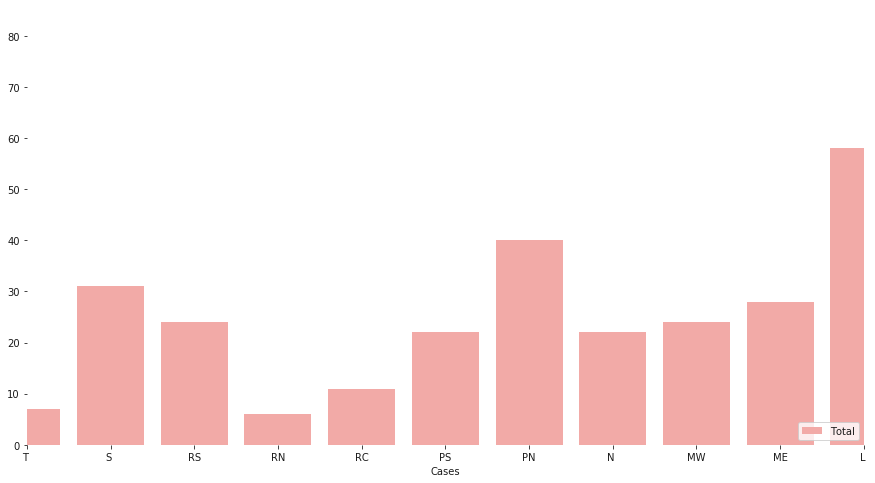

In [103]:
f, ax = plt.subplots(figsize=(15, 8))
data = ward_group[['Ward','Cases_Count']]
data.sort_values('Ward',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Ward", y="Cases_Count", data=data,
            label="Total", color="r")

            

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 10), ylabel="",
       xlabel="Cases")
sns.despine(left=True, bottom=True)
plt.show()

In [104]:
postal_cd=mumbai_pincodes

In [105]:
#postal_cd.shape
mum_postal_cd=postal_cd.loc[postal_cd['Region']== 'Mumbai']

In [106]:
mum_postal_cd.columns

Index(['Unnamed: 0', 'Pincode', ' Area', 'State', 'Number', 'Region',
       'Area_Tag', 'Latitude', 'Longitude', 'BMC_Ward'],
      dtype='object')

In [107]:
mum_final=mum_postal_cd[['Pincode',' Area']]

In [108]:
mum_final.shape

(89, 2)

In [109]:
zones=covid_zones_mumbai.groupby('Pincode')['Address'].count().reset_index()

In [110]:
zones.head()

,Pincode,Address
0,400001,2
1,400003,18
2,400004,7
3,400005,9
4,400006,2


In [111]:
zones.rename(columns={"Address": "Cases_Count"},inplace=True)

In [112]:
zones.columns

Index(['Pincode', 'Cases_Count'], dtype='object')

In [113]:
model_mum=mum_final.merge(zones,how='left',on='Pincode')
#mumbai_labs_final=mumbai_testing_labs.merge(Mumbai_covid_labs,how='left',on='Pincode',validate='m:1')

In [114]:
model_mum.head()

,Pincode,Area,Cases_Count
0,400001,Mumbai G.P.O.,2.0
1,400002,Thakurdwar,NaN
2,400003,Mandvi (Mumbai),18.0
3,400004,Madhavbaug,7.0
4,400005,Colaba,9.0


In [115]:
model_mum["Cases_Count"].fillna(0.0, inplace = True) 

In [116]:
model_mum1=model_mum[['Pincode','Cases_Count']]

In [117]:
kclusters = 3

clustering_covid_mumbai = model_mum1

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clustering_covid_mumbai)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:80]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [118]:
pincd_lst=mum_postal_cd['Pincode'].unique().tolist()
covid_lat_lst=mum_postal_cd['Latitude'].tolist()
covid_long_lst=mum_postal_cd['Longitude'].tolist()

In [119]:
cluster_labels=kmeans.labels_[0:]

In [120]:
type(cluster_labels)

numpy.ndarray

In [121]:
cluster_lst=cluster_labels.tolist()
#=cluster_labels

In [122]:
len(covid_lat_lst)

89

In [123]:
mumbai_clust=mumbai_covid_clusters.merge(covid_zones_mumbai,how='left',on='Pincode')

In [124]:
#Finally Plotting Clusters for Mumbai Covid-19 Zone
map_clusters = folium.Map(location=[latitude, longitude],tiles="Stamen Toner", zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
color_code = ['green','blue','red']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mumbai_covid_clusters['Latitude'], mumbai_covid_clusters['Longitude'], mumbai_covid_clusters['Pincode'], mumbai_covid_clusters['Cluster_label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    if cluster != 'Nan':
        val=int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=color_code[val],
        fill=True,
        fill_color=rainbow[val-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters